In [1]:
! pip install qiskit
! pip install pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister
from math import sqrt

In [3]:
# sender registers
q_C = QuantumRegister(1,name = "alice_qc")
c_C = ClassicalRegister(1,name = "alice_cc")
q_A = QuantumRegister(1,name = "alice_qa")
c_A = ClassicalRegister(1,name = "alice_ca")
# receiber registers
q_B = QuantumRegister(1,name = "bob_qb")
c_B = ClassicalRegister(1,name = "bob_cb")
# quanrum circuit
qc = QuantumCircuit(q_C,q_A,q_B,c_C,c_A,c_B)

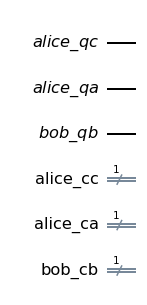

In [4]:
qc.draw("mpl")

Bell state between alice and bob:
- 

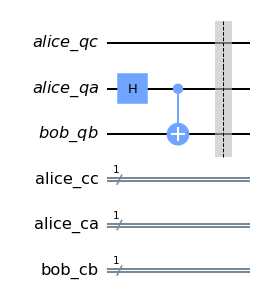

In [5]:
qc.h(q_A[0])
qc.cx(q_A[0],q_B[0])
qc.barrier()
qc.draw("mpl")

Alice construct the |ψc> state 

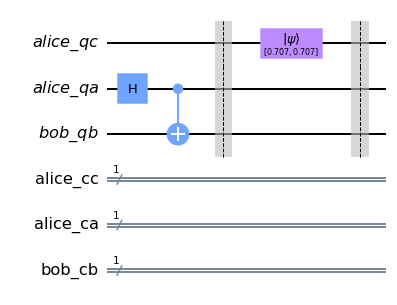

In [6]:
# aomplitude vector
ampl = [1/sqrt(2),1/sqrt(2)]
# intialize quantum state to be teleported
qc.initialize(ampl,q_C[0])
qc.barrier()
qc.draw("mpl")

Alice:
- Applies a CX gate on c as control and target a.
- Applies a Haddamard Gate on c

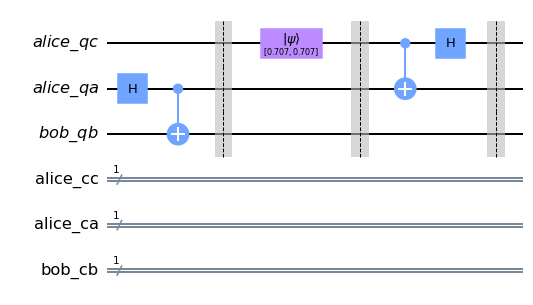

In [7]:
qc.cx(q_C[0],q_A[0])
qc.h(q_C[0])
qc.barrier()
qc.draw("mpl")

Alice performs the corresponding measurement on her Qubits:

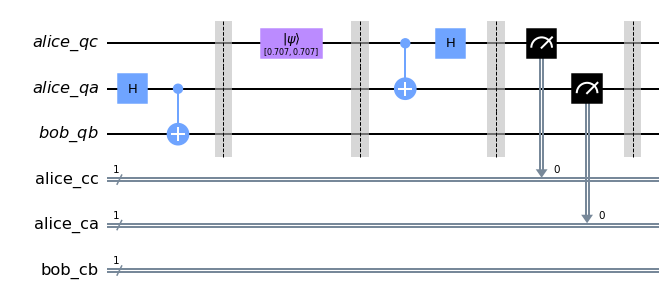

In [8]:
qc.measure(q_C[0],c_C[0])
qc.measure(q_A[0],c_A[0])
qc.barrier()
qc.draw("mpl")

Alice communicates with Bob who applies the corresponding gate and measures the state depending on Alice's measurements:

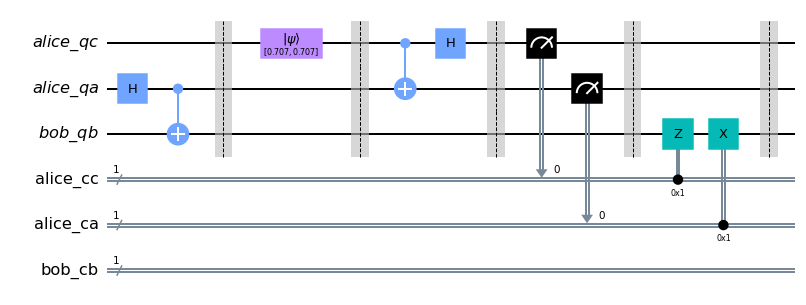

In [9]:
qc.z(q_B[0]).c_if(c_C,1)
qc.x(q_B[0]).c_if(c_A,1)
qc.barrier()
qc.draw("mpl")

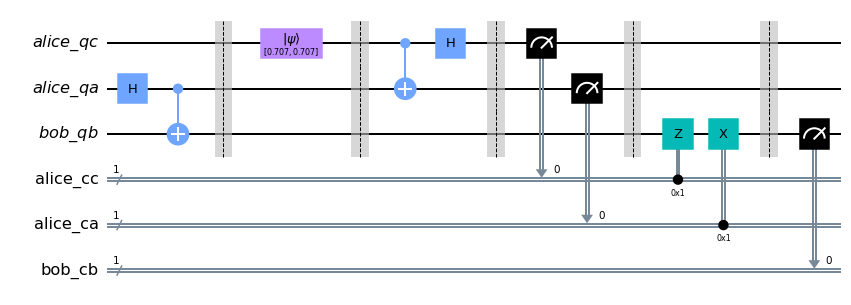

In [10]:
# Bob's Measurement
qc.measure(q_B[0],c_B)
qc.draw("mpl")

In [11]:
# simulate in an ideal qauntum computing:
from qiskit import transpile
from qiskit.providers.aer import QasmSimulator
repetitions = 1024 # number of times to carry out the experiment
backend = QasmSimulator()
qc_compiled = transpile(qc,backend)
job = backend.run(qc_compiled,shots = repetitions)
result = job.result()
counts = result.get_counts()
print(counts)

{'0 1 0': 123, '0 0 1': 132, '1 0 1': 116, '1 0 0': 135, '1 1 0': 116, '1 1 1': 140, '0 0 0': 121, '0 1 1': 141}


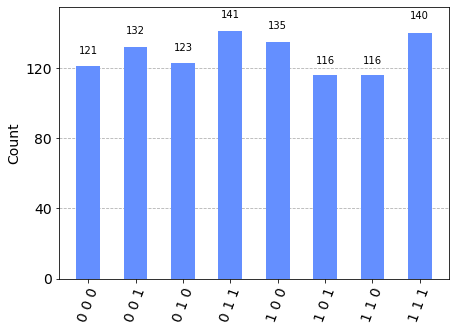

In [12]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

We can check out the amplitudes to see if they are the same as in the state |Ψc>. If that's the case, then Bob got the quantum state Alice sent.

In [13]:
a = sqrt((counts['0 0 0']+counts['0 0 1']+counts['0 1 0']+counts['0 1 1'])/repetitions)
b = sqrt((counts['1 0 0']+counts['1 0 1']+counts['1 1 0']+counts['1 1 1'])/repetitions)
print(f"Amplitude a: {a}\nAmplitude b:{b}")

Amplitude a: 0.7105510625563796
Amplitude b:0.7036456405748563


In [14]:
# simulate in a mock backend from a real quantum computer
from qiskit.providers.fake_provider import FakeJakarta
device_simulator = FakeJakarta()

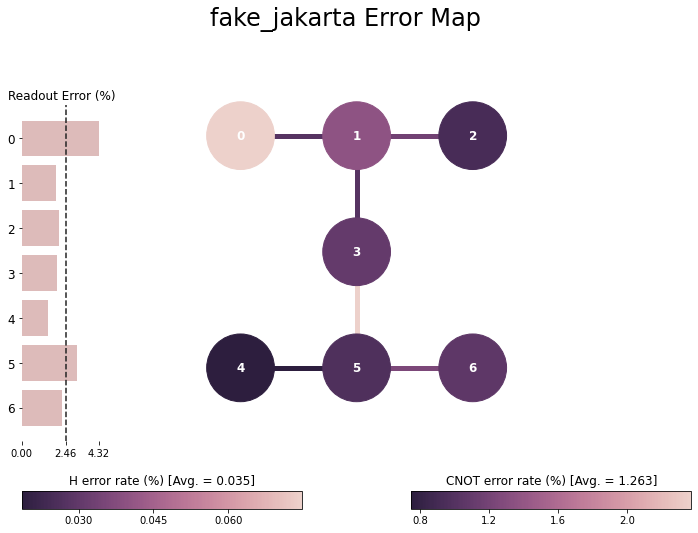

In [15]:
# error map
from qiskit.visualization import plot_error_map
plot_error_map(device_simulator)

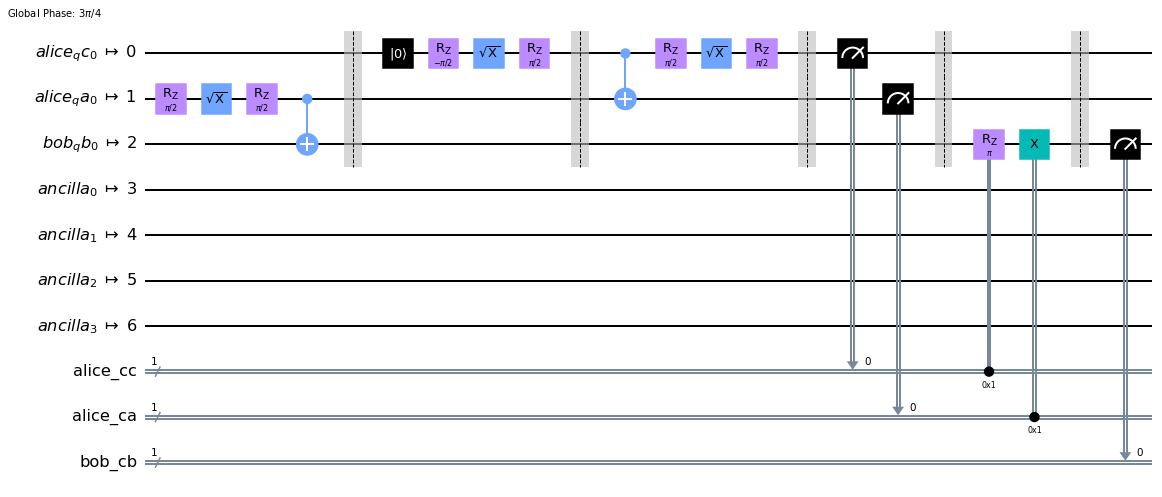

In [16]:
# transpile the quantum circuit with the mock computer's topology
qc_compiled = transpile(qc,device_simulator)
qc_compiled.draw("mpl")

In [17]:
job = device_simulator.run(qc_compiled,shots = repetitions)
result = job.result()
counts = result.get_counts()
print(counts)

{'0 1 0': 140, '1 0 0': 120, '1 1 0': 136, '1 0 1': 109, '0 0 1': 118, '0 0 0': 144, '0 1 1': 124, '1 1 1': 133}


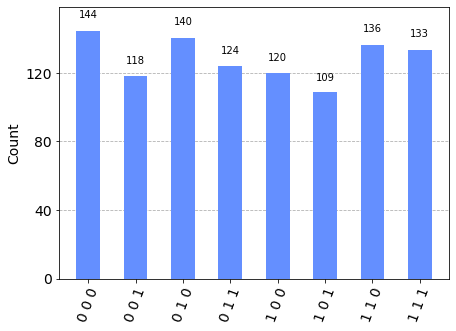

In [18]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [19]:
# see the quality of the measured state bob got
a = sqrt((counts['0 0 0']+counts['0 0 1']+counts['0 1 0']+counts['0 1 1'])/repetitions)
b = sqrt((counts['1 0 0']+counts['1 0 1']+counts['1 1 0']+counts['1 1 1'])/repetitions)
print(f"Amplitude a: {a}\nAmplitude b:{b}")

Amplitude a: 0.7167090588237321
Amplitude b:0.6973723001381686


A decent attempt. It is important to take into consideration this is not an ideal quantum computer, but ir replicates a real one somewhere in the galaxy...